In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [25]:
df=pd.read_csv('garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [26]:
df.shape

(1197, 15)

In [27]:
df.dropna(inplace=True)
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 0 to 1191
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   691 non-null    object 
 1   quarter                691 non-null    object 
 2   department             691 non-null    object 
 3   day                    691 non-null    object 
 4   team                   691 non-null    int64  
 5   targeted_productivity  691 non-null    float64
 6   smv                    691 non-null    float64
 7   wip                    691 non-null    float64
 8   over_time              691 non-null    int64  
 9   incentive              691 non-null    int64  
 10  idle_time              691 non-null    float64
 11  idle_men               691 non-null    int64  
 12  no_of_style_change     691 non-null    int64  
 13  no_of_workers          691 non-null    float64
 14  actual_productivity    691 non-null    float64
dtypes: float64

In [29]:
X = df.drop(['date','quarter','department','day'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
pca.explained_variance_

array([2.68938028, 2.09879185])

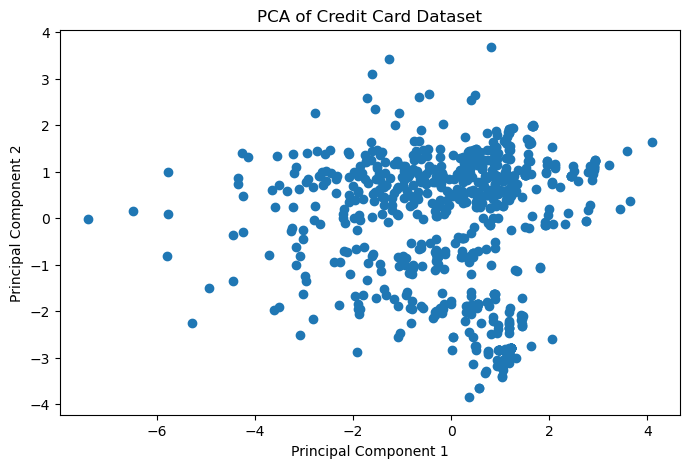

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title("PCA of Credit Card Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


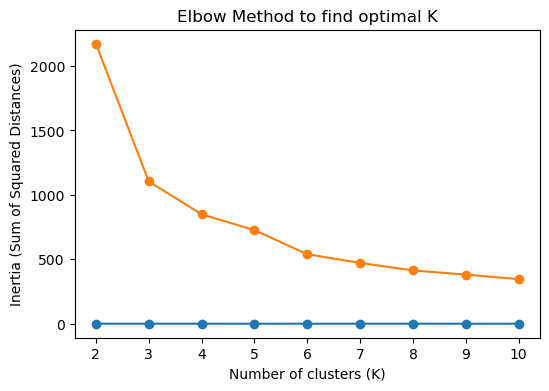

K-Means Silhouette Score: 0.4727149804449977


In [31]:
k_grid = [2,3,4,5,6,7,8,9,10]
results = []
X_scaled=X_pca
for k in k_grid:
    km = KMeans(n_clusters=k, random_state=42)
    labs = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labs)
    results.append((sil, km.inertia_))

plt.figure(figsize=(6,4))
plt.plot(k_grid, results, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method to find optimal K")
plt.show()
kmeans = KMeans(n_clusters=3, random_state=42)
k_labels = kmeans.fit_predict(X_scaled)
k_sil_score = silhouette_score(X_scaled, k_labels)
print(f"K-Means Silhouette Score: {k_sil_score}")

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
results = []
a_grid = [2, 3, 4, 5]
for a in a_grid:
    agglo = AgglomerativeClustering(n_clusters=a)
    labs = agglo.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labs)
    results.append(sil)
agglo = AgglomerativeClustering(n_clusters=3)
a_labels = agglo.fit_predict(X_scaled)
a_sil_score = silhouette_score(X_scaled, a_labels)
print(f"Hierarchical Clustering Silhouette Score: {a_sil_score}")

Hierarchical Clustering Silhouette Score: 0.45102395134454


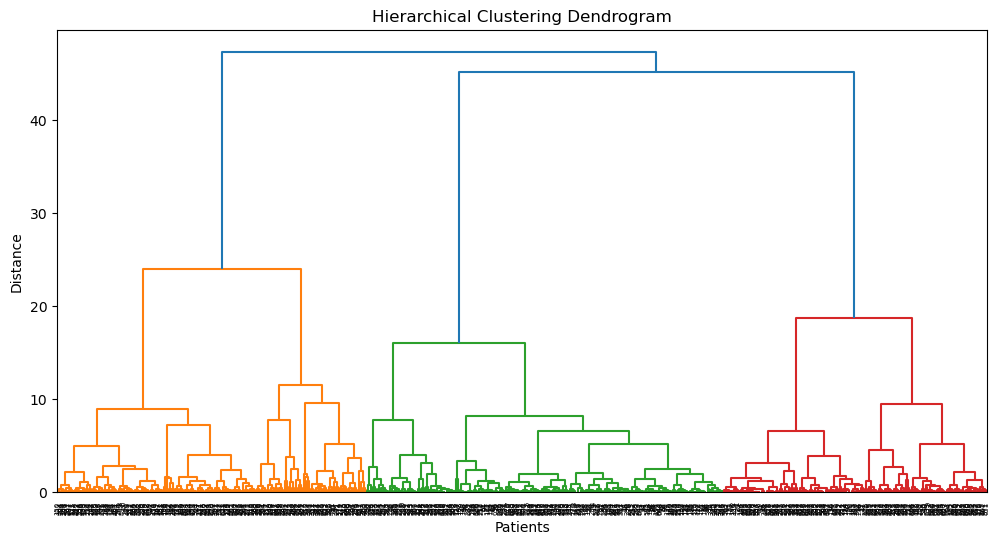

In [33]:
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Patients")
plt.ylabel("Distance")
plt.show()

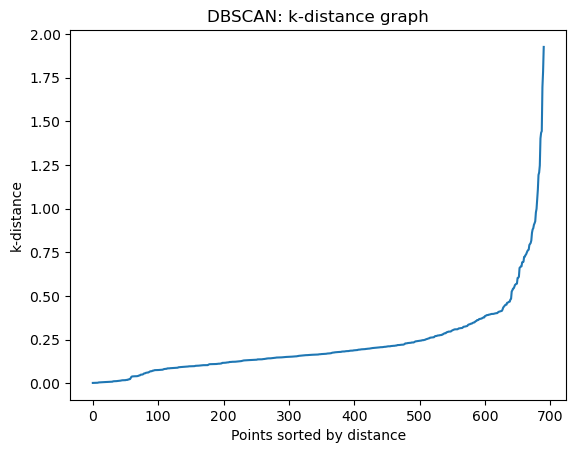

In [34]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors()
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:,-1])
plt.plot(distances)
plt.ylabel("k-distance")
plt.xlabel("Points sorted by distance")
plt.title("DBSCAN: k-distance graph")
plt.show()

In [36]:

results = []
dbscan_grid = [(0.5, 3), (1.0, 3), (1.5, 3), (2.0, 3), (2.5, 3)]

for eps, min_samples in dbscan_grid:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labs = dbscan.fit_predict(X_scaled)
    valid = (labs != -1)
    if len(set(labs[valid])) > 1:
        sil = silhouette_score(X_scaled[valid], labs[valid])
    else:
        sil = np.nan
    results.append(sil)
print(results)
dbscan = DBSCAN(eps=1.0, min_samples=3)
d_labels = dbscan.fit_predict(X_scaled)
valid = (d_labels != -1)
if len(set(d_labels[valid])) > 1:
    d_sil_score = silhouette_score(X_scaled[valid], d_labels[valid])
else:
    d_sil_score = -1
print(f"DBSCAN Silhouette Score: {d_sil_score}")



[np.float64(0.4137912999011063), np.float64(0.5552655543175974), nan, nan, nan]
DBSCAN Silhouette Score: 0.5552655543175974
